<a href="https://colab.research.google.com/github/MAL3X-01/Bitcoin-StorytellingProject/blob/master/BitcoinStorytellingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Gold Data Cleanup

In [2]:
# https://www.perthmint.com/historical_metal_prices.aspx
goldold = pd.read_csv('goldmonthlyend.csv')

goldcurrent = pd.read_csv('goldmonthly-current.csv')

goldold.head()

,Market,Perth Mint Spot,Perth Mint Spot.1,Perth Mint Spot.2,Perth Mint Spot.3,Perth Mint Spot.4,Perth Mint Spot.5,Perth Mint Spot.6,Perth Mint Spot.7,Perth Mint Spot.8,Perth Mint Spot.9,Perth Mint Spot.10,Perth Mint Spot.11,Perth Mint Spot.12,Perth Mint Spot.13,Perth Mint Spot.14,Perth Mint Spot.15,Perth Mint Spot.16,Perth Mint Spot.17,Perth Mint Spot.18,Perth Mint Spot.19,Perth Mint Spot.20,Perth Mint Spot.21,Perth Mint Spot.22,Perth Mint Spot.23,Perth Mint Spot.24,Perth Mint Spot.25,Perth Mint Spot.26,Perth Mint Spot.27,Perth Mint Spot.28,Perth Mint Spot.29,Perth Mint Spot.30,Perth Mint Spot.31,Perth Mint Spot.32,Perth Mint Spot.33,Perth Mint Spot.34,Perth Mint Spot.35,Perth Mint Spot.36,Perth Mint Spot.37,Perth Mint Spot.38,Perth Mint Spot.39,Perth Mint Spot.40,Perth Mint Spot.41,Perth Mint Spot.42,Perth Mint Spot.43,Perth Mint Spot.44,Perth Mint Spot.45,Perth Mint Spot.46,Perth Mint Spot.47,Perth Mint Spot.48,Perth Mint Spot.49,Perth Mint Spot.50,Perth Mint Spot.51,Perth Mint Spot.52,Perth Mint Spot.53,Perth Mint Spot.54,Perth Mint Spot.55,Perth Mint Spot.56,Perth Mint Spot.57,Perth Mint Spot.58,Perth Mint Spot.59,Perth Mint Spot.60,Perth Mint Spot.61,Perth Mint Spot.62,Perth Mint Spot.63,Perth Mint Spot.64,Perth Mint Spot.65,Perth Mint Spot.66,Perth Mint Spot.67,Perth Mint Spot.68,Perth Mint Spot.69,Perth Mint Spot.70,Perth Mint Spot.71,Perth Mint Spot.72,Perth Mint Spot.73,Perth Mint Spot.74,Perth Mint Spot.75,Perth Mint Spot.76,Perth Mint Spot.77,Perth Mint Spot.78,Perth Mint Spot.79,Perth Mint Spot.80,Perth Mint Spot.81,Perth Mint Spot.82,Perth Mint Spot.83,Perth Mint Spot.84,Perth Mint Spot.85,Perth Mint Spot.86,Perth Mint Spot.87,Perth Mint Spot.88,Perth Mint Spot.89,London Fix,London Fix.1,London Fix.2,London Fix.3,London Fix.4,London Fix.5,London Fix.6,HSRA,Interest Rates,Interest Rates.1,London Fix.7,London Fix.8,London Fix.9,London Fix.10,London Fix.11,London Fix.12,London Fix.13,HSRA.1,Interest Rates.2,Interest Rates.3,London Fix.14,London Fix.15,London Fix.16,London Fix.17,London Fix.18,London Fix.19,London Fix.20,HSRA.2,Interest Rates.4,Interest Rates.5,Stock,Stock.1,CPI,CPIAUCSL_PC1,FEDFUNDS,Real US Short Term Interest Rates,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227
0,Metal/Currency,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD

In [3]:
goldcurrent.head()

,Market,Perth Mint Spot,Perth Mint Spot.1,Perth Mint Spot.2,Perth Mint Spot.3,Perth Mint Spot.4,Perth Mint Spot.5,Perth Mint Spot.6,Perth Mint Spot.7,Perth Mint Spot.8,Perth Mint Spot.9,Perth Mint Spot.10,Perth Mint Spot.11,Perth Mint Spot.12,Perth Mint Spot.13,Perth Mint Spot.14,Perth Mint Spot.15,Perth Mint Spot.16,Perth Mint Spot.17,Perth Mint Spot.18,Perth Mint Spot.19,Perth Mint Spot.20,Perth Mint Spot.21,Perth Mint Spot.22,Perth Mint Spot.23,Perth Mint Spot.24,Perth Mint Spot.25,Perth Mint Spot.26,Perth Mint Spot.27,Perth Mint Spot.28,Perth Mint Spot.29,Perth Mint Spot.30,Perth Mint Spot.31,Perth Mint Spot.32,Perth Mint Spot.33,Perth Mint Spot.34,Perth Mint Spot.35,Perth Mint Spot.36,Perth Mint Spot.37,Perth Mint Spot.38,Perth Mint Spot.39,Perth Mint Spot.40,Perth Mint Spot.41,Perth Mint Spot.42,Perth Mint Spot.43,Perth Mint Spot.44,Perth Mint Spot.45,Perth Mint Spot.46,Perth Mint Spot.47,Perth Mint Spot.48,Perth Mint Spot.49,Perth Mint Spot.50,Perth Mint Spot.51,Perth Mint Spot.52,Perth Mint Spot.53,Perth Mint Spot.54,Perth Mint Spot.55,Perth Mint Spot.56,Perth Mint Spot.57,Perth Mint Spot.58,Perth Mint Spot.59,Perth Mint Spot.60,Perth Mint Spot.61,Perth Mint Spot.62,Perth Mint Spot.63,Perth Mint Spot.64,Perth Mint Spot.65,Perth Mint Spot.66,Perth Mint Spot.67,Perth Mint Spot.68,Perth Mint Spot.69,Perth Mint Spot.70,Perth Mint Spot.71,Perth Mint Spot.72,Perth Mint Spot.73,Perth Mint Spot.74,Perth Mint Spot.75,Perth Mint Spot.76,Perth Mint Spot.77,Perth Mint Spot.78,Perth Mint Spot.79,Perth Mint Spot.80,Perth Mint Spot.81,Perth Mint Spot.82,Perth Mint Spot.83,Perth Mint Spot.84,Perth Mint Spot.85,Perth Mint Spot.86,Perth Mint Spot.87,Perth Mint Spot.88,Perth Mint Spot.89,London Fix,London Fix.1,London Fix.2,London Fix.3,London Fix.4,London Fix.5,London Fix.6,HSRA,Interest Rates,Interest Rates.1,London Fix.7,London Fix.8,London Fix.9,London Fix.10,London Fix.11,London Fix.12,London Fix.13,HSRA.1,Interest Rates.2,Interest Rates.3,London Fix.14,London Fix.15,London Fix.16,London Fix.17,London Fix.18,London Fix.19,London Fix.20,HSRA.2,Interest Rates.4,Interest Rates.5,Stock,Stock.1,CPI,CPIAUCSL_PC1,FEDFUNDS,Real US Short Term Interest Rates
0,Metal/Currency,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Gold,Silver,Platinum,Platinum,Palladium,Palladium,AUD,Federal Funds Rate,On Call Unofficial,Gold,Gold,Silver,Platinum,Platinum,Palladium,Palladium,AUD,Federal Funds Rate,On Call Unofficial,Gold,Gold,Silver,Platinum,Platinum,Palladium,Palladium,AUD,Federal Funds Rate,On Call Unofficial,S&P/ASX 200,S&P/ASX 200,All Groups Australia,Consumer Price Index for All Urban Consumers: ...,Effective Federal Funds Rate,NaN
1,Priced In,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,JPY,JPY,JPY,JPY,AUD,AUD,AUD,AUD,AUD,AUD,AUD,AUD,JPY,JPY,JPY,JPY,JPY,JPY,JPY,JPY,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,JPY,JPY,JPY,JPY,AUD,AUD,AUD,AUD,AUD,AUD,AUD,AUD,JPY,JPY,JPY,JPY,JPY,JPY,JPY,JPY,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,JPY,JPY,JPY,JPY,AUD,AUD,AUD,AUD,AUD,AUD,AUD,AUD,JPY,JPY,JPY,JPY,JPY,JPY,JPY,JPY,USD,USD,USD,USD,USD,USD,USD,USD,USD,AUD,USD,USD,USD,USD,USD,USD,USD,USD,USD,AUD,USD,USD,USD,USD,USD,USD,USD,USD,USD,AUD,Accumulation Index,NaN,Index,USD,USD,NaN
2,Price Type,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask

In [4]:
# Just need the first 2 columns and index 4 and below
newgoldold = goldold[['Market','Perth Mint Spot']][4:]

print(newgoldold.shape)
newgoldold.head()

(2025, 2)


,Market,Perth Mint Spot
4,Jan 68,NaN
5,Feb 68,NaN
6,Mar 68,NaN
7,Apr 68,NaN
8,May 68,NaN


In [5]:
# Dropping nullvalue 
newgoldold = newgoldold.dropna()

print(newgoldold.shape)
newgoldold.head()

(295, 2)


,Market,Perth Mint Spot
285,Jun 91,368.25
286,Jul 91,371.25
287,Aug 91,364.00
288,Sep 91,354.00
289,Oct 91,363.50


In [6]:
# Just need the first 2 columns and index 4 and below
newgoldcurrent = goldcurrent[['Market','Perth Mint Spot']][4:]

print(newgoldcurrent.shape)
newgoldcurrent.head()

(41, 2)


,Market,Perth Mint Spot
4,Jan 16,1121.35
5,Feb 16,1242.96
6,Mar 16,1277.2
7,Apr 16,1273.27
8,May 16,1296.61


In [7]:
# Dropping null values
newgoldcurrent = newgoldcurrent.dropna()

print(newgoldcurrent.shape)
newgoldcurrent.head()

(41, 2)


,Market,Perth Mint Spot
4,Jan 16,1121.35
5,Feb 16,1242.96
6,Mar 16,1277.2
7,Apr 16,1273.27
8,May 16,1296.61


In [8]:
# concatting 2 df
goldmonthlyprice = pd.concat([newgoldold, newgoldcurrent])

# reset index and dropping it
goldmonthlyprice = goldmonthlyprice.reset_index()
goldmonthlyprice = goldmonthlyprice.drop(columns='index')

print(goldmonthlyprice.shape)
goldmonthlyprice.head()

(336, 2)


,Market,Perth Mint Spot
0,Jun 91,368.25
1,Jul 91,371.25
2,Aug 91,364.00
3,Sep 91,354.00
4,Oct 91,363.50


In [9]:
goldmonthlyprice.isnull().sum()

Market             0
Perth Mint Spot    0
dtype: int64

In [10]:
# renaming columns
goldmonthlyprice = goldmonthlyprice.rename(columns={'Market':'Date', 'Perth Mint Spot':'Price'})

goldmonthlyprice.head()

,Date,Price
0,Jun 91,368.25
1,Jul 91,371.25
2,Aug 91,364.00
3,Sep 91,354.00
4,Oct 91,363.50


In [11]:
goldmonthlyprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
Date     336 non-null object
Price    336 non-null object
dtypes: object(2)
memory usage: 5.3+ KB


In [12]:
# splitting date into list
goldmonthlyprice['Date'] = goldmonthlyprice['Date'].apply(lambda x: x.split())

goldmonthlyprice.head()

,Date,Price
0,"[Jun, 91]",368.25
1,"[Jul, 91]",371.25
2,"[Aug, 91]",364.00
3,"[Sep, 91]",354.00
4,"[Oct, 91]",363.50


In [13]:
# fixing date by making new columns 
goldmonthlyprice['Month'] = goldmonthlyprice['Date'].apply(lambda x: x[0])
goldmonthlyprice['Year'] = goldmonthlyprice['Date'].apply(lambda x: int(x[1]))

# adding missing first 2 digits for year 
goldmonthlyprice['Year'] = goldmonthlyprice['Year'].apply(lambda x: '19'+str(x) if x >90 else ('200'+str(x) if x<10 else '20'+str(x)))
goldmonthlyprice.head()

,Date,Price,Month,Year
0,"[Jun, 91]",368.25,Jun,1991
1,"[Jul, 91]",371.25,Jul,1991
2,"[Aug, 91]",364.00,Aug,1991
3,"[Sep, 91]",354.00,Sep,1991
4,"[Oct, 91]",363.50,Oct,1991


In [14]:
# remaking date to make it datetime format ready
goldmonthlyprice['Date'] = goldmonthlyprice['Month'] + goldmonthlyprice['Year']

goldmonthlyprice.head()

,Date,Price,Month,Year
0,Jun1991,368.25,Jun,1991
1,Jul1991,371.25,Jul,1991
2,Aug1991,364.00,Aug,1991
3,Sep1991,354.00,Sep,1991
4,Oct1991,363.50,Oct,1991


In [15]:
goldmonthlyprice['Date'].head().values

array(['Jun1991', 'Jul1991', 'Aug1991', 'Sep1991', 'Oct1991'],
      dtype=object)

In [16]:
# date into datetime format
goldmonthlyprice['Date'] = pd.to_datetime(goldmonthlyprice['Date'], infer_datetime_format=True)

goldmonthlyprice.head()

,Date,Price,Month,Year
0,1991-06-01,368.25,Jun,1991
1,1991-07-01,371.25,Jul,1991
2,1991-08-01,364.00,Aug,1991
3,1991-09-01,354.00,Sep,1991
4,1991-10-01,363.50,Oct,1991


In [17]:
goldmonthlyprice['Price'].head().values

array([' 368.25 ', ' 371.25 ', ' 364.00 ', ' 354.00 ', ' 363.50 '],
      dtype=object)

In [0]:
# fixing year column to be int 
goldmonthlyprice['Year'] = goldmonthlyprice['Year'].apply(lambda x: int(x))

# fixing price to get rid of ,
goldmonthlyprice['Price'] = goldmonthlyprice['Price'].apply(lambda x: x.split()[0])
goldmonthlyprice['Price'] = goldmonthlyprice['Price'].apply(lambda x: x.replace(',', ''))

In [19]:
# making price into float
goldmonthlyprice['Price'] = goldmonthlyprice['Price'].apply(lambda x: str(x))
goldmonthlyprice['Price'] = goldmonthlyprice['Price'].apply(lambda x: float(x))

goldmonthlyprice['Price'].head().values

array([368.25, 371.25, 364.  , 354.  , 363.5 ])

In [20]:
print(goldmonthlyprice.shape)
goldmonthlyprice.head()

(336, 4)


,Date,Price,Month,Year
0,1991-06-01,368.25,Jun,1991
1,1991-07-01,371.25,Jul,1991
2,1991-08-01,364.00,Aug,1991
3,1991-09-01,354.00,Sep,1991
4,1991-10-01,363.50,Oct,1991


In [21]:
goldmonthlyprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
Date     336 non-null datetime64[ns]
Price    336 non-null float64
Month    336 non-null object
Year     336 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 10.6+ KB


# Bitcoin Data Cleanup

In [0]:
# https://datahub.io/cryptocurrency/bitcoin
bitcoindata = pd.read_csv('bitcoin_csv.csv')

#https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20181123&end=20190623
btcdatacmc = pd.read_csv('btcpricecmc.csv')

## Data From CoinMarketCap

In [23]:
print(btcdatacmc.shape)
btcdatacmc.head()

(213, 7)


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jun 23, 2019","10,696.69","11,246.14","10,556.10","10,855.37","20,998,326,502","192,970,090,355"
1,"Jun 22, 2019","10,175.92","11,157.35","10,107.04","10,701.69","29,995,204,861","190,214,124,824"
2,"Jun 21, 2019","9,525.07","10,144.56","9,525.07","10,144.56","20,624,008,643","180,293,241,528"
3,"Jun 20, 2019","9,273.06","9,594.42","9,232.48","9,527.16","17,846,823,784","169,304,784,791"
4,"Jun 19, 2019","9,078.73","9,299.62","9,070.40","9,273.52","15,546,809,946","164,780,855,869"


In [24]:
# creating new df with only 2 columns from last df
btcpricecmc = btcdatacmc[['Date', 'High']]

print(btcpricecmc.shape)
btcpricecmc.head()

(213, 2)


,Date,High
0,"Jun 23, 2019","11,246.14"
1,"Jun 22, 2019","11,157.35"
2,"Jun 21, 2019","10,144.56"
3,"Jun 20, 2019","9,594.42"
4,"Jun 19, 2019","9,299.62"


In [25]:
# renaming column
btcpricecmc = btcpricecmc.rename(columns={'High':'Price'})

print(btcpricecmc.shape)
btcpricecmc.head()

(213, 2)


,Date,Price
0,"Jun 23, 2019","11,246.14"
1,"Jun 22, 2019","11,157.35"
2,"Jun 21, 2019","10,144.56"
3,"Jun 20, 2019","9,594.42"
4,"Jun 19, 2019","9,299.62"


In [26]:
# date into datetime format
btcpricecmc['Date'] = pd.to_datetime(btcpricecmc['Date'], infer_datetime_format=True)

print(btcpricecmc.shape)
btcpricecmc.head()

(213, 2)


,Date,Price
0,2019-06-23,"11,246.14"
1,2019-06-22,"11,157.35"
2,2019-06-21,"10,144.56"
3,2019-06-20,"9,594.42"
4,2019-06-19,"9,299.62"


In [27]:
# reversing df
btcpricecmc = btcpricecmc.iloc[::-1]

print(btcpricecmc.shape)
btcpricecmc.head()

(213, 2)


,Date,Price
212,2018-11-23,"4,396.42"
211,2018-11-24,"4,413.09"
210,2018-11-25,"4,120.87"
209,2018-11-26,"4,107.14"
208,2018-11-27,"3,862.96"


## Data From DataHub.io

In [28]:
print(bitcoindata.shape)
bitcoindata.head()

(3605, 16)


,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.0,14,1.0,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.0,61,1.0,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.0,93,1.0,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.0,102,1.0,5.0,NaN,0.0,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.0,123,1.0,NaN,NaN,NaN,26527,123


In [29]:
# making new df with only 2 columns from last df
btcprice = bitcoindata[['date', 'price(USD)']]

print(btcprice.shape)
btcprice.head()

(3605, 2)


,date,price(USD)
0,2009-01-09,NaN
1,2009-01-10,NaN
2,2009-01-11,NaN
3,2009-01-12,NaN
4,2009-01-13,NaN


In [30]:
# adding a unique missin data by making a df
data = {'date':['2009-01-09'], 'price(USD)':[0.01]} 
birth = pd.DataFrame(data)
birth.head()

,date,price(USD)
0,2009-01-09,0.01


In [31]:
# drop null value rows
btcprice = btcprice.dropna()
# concat 2df 
btcprice = pd.concat([birth, btcprice])

print(btcprice.shape)
btcprice.head()

(2036, 2)


,date,price(USD)
0,2009-01-09,0.01
1570,2013-04-28,135.30
1571,2013-04-29,134.44
1572,2013-04-30,144.00
1573,2013-05-01,139.00


In [32]:
btcprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 3604
Data columns (total 2 columns):
date          2036 non-null object
price(USD)    2036 non-null float64
dtypes: float64(1), object(1)
memory usage: 47.7+ KB


In [33]:
# date into datime form
btcprice['date'] = pd.to_datetime(btcprice['date'], infer_datetime_format=True)

# Begin:2013-04-28	135.30           END:2018-11-22	4611.57
print(btcprice.shape)
btcprice.head()

(2036, 2)


,date,price(USD)
0,2009-01-09,0.01
1570,2013-04-28,135.30
1571,2013-04-29,134.44
1572,2013-04-30,144.00
1573,2013-05-01,139.00


In [34]:
# renaming columns
btcprice = btcprice.rename(columns={'date':'Date', 'price(USD)':'Price'})

print(btcprice.shape)
btcprice.head()

(2036, 2)


,Date,Price
0,2009-01-09,0.01
1570,2013-04-28,135.30
1571,2013-04-29,134.44
1572,2013-04-30,144.00
1573,2013-05-01,139.00


In [35]:
# droping null value rows
bitcoindata = bitcoindata.dropna()

print(bitcoindata.shape)
bitcoindata.head()

(2035, 16)


,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
1570,2013-04-28,6.879868e+07,3.153714e+07,41702,1.500656e+09,135.30,0.0,4425.0000,32.791942,117984,8.974296e+06,130171.0,49.980091,0.0005,21597536,177
1571,2013-04-29,1.138128e+08,4.821652e+07,51602,1.491703e+09,134.44,0.0,4349.9988,45.724114,86925,8.974296e+06,112426.0,62.425891,0.0005,25676453,174
1572,2013-04-30,8.426632e+07,5.686790e+07,47450,1.598310e+09,144.00,0.0,3725.0000,45.748651,76871,9.854414e+06,98258.0,26.942145,0.0005,27042465,149
1573,2013-05-01,1.206825e+08,8.208736e+07,55176,1.543334e+09,139.00,0.0,3775.0000,40.885938,83564,1.007629e+07,96129.0,38.671980,0.0005,25727393,151
1574,2013-05-02,9.337533e+07,5.823736e+07,55295,1.292577e+09,116.38,0.0,3350.0000,52.554004,81920,1.007629e+07,101721.0,35.382348,0.0005,26388234,134


In [36]:
bitcoindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 1570 to 3604
Data columns (total 16 columns):
date                     2035 non-null object
txVolume(USD)            2035 non-null float64
adjustedTxVolume(USD)    2035 non-null float64
txCount                  2035 non-null int64
marketcap(USD)           2035 non-null float64
price(USD)               2035 non-null float64
exchangeVolume(USD)      2035 non-null float64
generatedCoins           2035 non-null float64
fees                     2035 non-null float64
activeAddresses          2035 non-null int64
averageDifficulty        2035 non-null float64
paymentCount             2035 non-null float64
medianTxValue(USD)       2035 non-null float64
medianFee                2035 non-null float64
blockSize                2035 non-null int64
blockCount               2035 non-null int64
dtypes: float64(11), int64(4), object(1)
memory usage: 270.3+ KB


In [37]:
# date into datime form 
bitcoindata['date'] = pd.to_datetime(bitcoindata['date'] , infer_datetime_format=True)

print(bitcoindata.shape)
bitcoindata.head()

(2035, 16)


,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
1570,2013-04-28,6.879868e+07,3.153714e+07,41702,1.500656e+09,135.30,0.0,4425.0000,32.791942,117984,8.974296e+06,130171.0,49.980091,0.0005,21597536,177
1571,2013-04-29,1.138128e+08,4.821652e+07,51602,1.491703e+09,134.44,0.0,4349.9988,45.724114,86925,8.974296e+06,112426.0,62.425891,0.0005,25676453,174
1572,2013-04-30,8.426632e+07,5.686790e+07,47450,1.598310e+09,144.00,0.0,3725.0000,45.748651,76871,9.854414e+06,98258.0,26.942145,0.0005,27042465,149
1573,2013-05-01,1.206825e+08,8.208736e+07,55176,1.543334e+09,139.00,0.0,3775.0000,40.885938,83564,1.007629e+07,96129.0,38.671980,0.0005,25727393,151
1574,2013-05-02,9.337533e+07,5.823736e+07,55295,1.292577e+09,116.38,0.0,3350.0000,52.554004,81920,1.007629e+07,101721.0,35.382348,0.0005,26388234,134


In [38]:
bitcoindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 1570 to 3604
Data columns (total 16 columns):
date                     2035 non-null datetime64[ns]
txVolume(USD)            2035 non-null float64
adjustedTxVolume(USD)    2035 non-null float64
txCount                  2035 non-null int64
marketcap(USD)           2035 non-null float64
price(USD)               2035 non-null float64
exchangeVolume(USD)      2035 non-null float64
generatedCoins           2035 non-null float64
fees                     2035 non-null float64
activeAddresses          2035 non-null int64
averageDifficulty        2035 non-null float64
paymentCount             2035 non-null float64
medianTxValue(USD)       2035 non-null float64
medianFee                2035 non-null float64
blockSize                2035 non-null int64
blockCount               2035 non-null int64
dtypes: datetime64[ns](1), float64(11), int64(4)
memory usage: 270.3 KB


## Concat Data

In [39]:
# concatting 2 df
fbtcprice = pd.concat([btcprice, btcpricecmc])

print(fbtcprice.shape)
fbtcprice.head()

(2249, 2)


,Date,Price
0,2009-01-09,0.01
1570,2013-04-28,135.3
1571,2013-04-29,134.44
1572,2013-04-30,144
1573,2013-05-01,139


In [40]:
fbtcprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2249 entries, 0 to 0
Data columns (total 2 columns):
Date     2249 non-null datetime64[ns]
Price    2249 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 52.7+ KB


In [41]:
# Functions to make string and replace , with blank and back the float
fbtcprice['Price'] = fbtcprice['Price'].apply(lambda x: str(x))
fbtcprice['Price'] = fbtcprice['Price'].apply(lambda x: x.replace(',', ''))
fbtcprice['Price'] = fbtcprice['Price'].apply(lambda x: float(x))
# resetting index and droping it
fbtcprice = fbtcprice.reset_index(drop=True)

print(fbtcprice.shape)
fbtcprice.head()

(2249, 2)


,Date,Price
0,2009-01-09,0.01
1,2013-04-28,135.30
2,2013-04-29,134.44
3,2013-04-30,144.00
4,2013-05-01,139.00


In [42]:
fbtcprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 2 columns):
Date     2249 non-null datetime64[ns]
Price    2249 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.2 KB


# Top Stocks Data Cleanup

In [43]:
# yahoo finance  https://finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI
aapl = pd.read_csv('AAPL.csv')
fb = pd.read_csv('FB.csv')
goog = pd.read_csv('GOOG.csv')
nflx = pd.read_csv('NFLX.csv')
nvda = pd.read_csv('NVDA.csv')
amzn = pd.read_csv('AMZN.csv')
djia = pd.read_csv('^DJI.csv')
sp500 = pd.read_csv('^GSPC.csv')

print(aapl.shape)
aapl.head()

(2768, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-06-25,24.944286,25.547142,24.840000,25.341429,16.832920,161112700
1,2008-06-26,24.867144,24.977142,24.001429,24.037144,15.966555,217402500
2,2008-06-27,23.787144,24.367144,23.450001,24.298571,16.140207,260562400
3,2008-06-30,24.312857,24.571428,23.802856,23.920000,15.888747,171049200
4,2008-07-01,23.461428,24.959999,23.428572,24.954287,16.575764,277820200


In [44]:
# creating a tick column so I can differtiate them when I concat them all
aapl['Tick'] = 'AAPL'
fb['Tick'] = 'FB'
goog['Tick'] = 'GOOG'
nflx['Tick'] = 'NFLX'
nvda['Tick'] = 'NVDA'
amzn['Tick'] = 'AMZN'
djia['Tick'] = 'DJIA'
sp500['Tick'] = 'SP500'

print(aapl.shape)
aapl.head()

(2768, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Tick
0,2008-06-25,24.944286,25.547142,24.840000,25.341429,16.832920,161112700,AAPL
1,2008-06-26,24.867144,24.977142,24.001429,24.037144,15.966555,217402500,AAPL
2,2008-06-27,23.787144,24.367144,23.450001,24.298571,16.140207,260562400,AAPL
3,2008-06-30,24.312857,24.571428,23.802856,23.920000,15.888747,171049200,AAPL
4,2008-07-01,23.461428,24.959999,23.428572,24.954287,16.575764,277820200,AAPL


In [45]:
print(aapl.shape)
aapl.head()

(2768, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Tick
0,2008-06-25,24.944286,25.547142,24.840000,25.341429,16.832920,161112700,AAPL
1,2008-06-26,24.867144,24.977142,24.001429,24.037144,15.966555,217402500,AAPL
2,2008-06-27,23.787144,24.367144,23.450001,24.298571,16.140207,260562400,AAPL
3,2008-06-30,24.312857,24.571428,23.802856,23.920000,15.888747,171049200,AAPL
4,2008-07-01,23.461428,24.959999,23.428572,24.954287,16.575764,277820200,AAPL


In [46]:
# concating all stocks df
stocks = pd.concat([aapl, fb, goog, nflx, nvda, amzn, djia, sp500])

print(stocks.shape)
stocks.head()

(21161, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Tick
0,2008-06-25,24.944286,25.547142,24.840000,25.341429,16.832920,161112700,AAPL
1,2008-06-26,24.867144,24.977142,24.001429,24.037144,15.966555,217402500,AAPL
2,2008-06-27,23.787144,24.367144,23.450001,24.298571,16.140207,260562400,AAPL
3,2008-06-30,24.312857,24.571428,23.802856,23.920000,15.888747,171049200,AAPL
4,2008-07-01,23.461428,24.959999,23.428572,24.954287,16.575764,277820200,AAPL


In [47]:
# reseting index and drop it 
stocks = stocks.reset_index(drop=True)

stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Tick         0
dtype: int64

In [48]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21161 entries, 0 to 21160
Data columns (total 8 columns):
Date         21161 non-null object
Open         21161 non-null float64
High         21161 non-null float64
Low          21161 non-null float64
Close        21161 non-null float64
Adj Close    21161 non-null float64
Volume       21161 non-null int64
Tick         21161 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 1.3+ MB


In [49]:
# adding a feature column
stocks['First of month'] = stocks['Date'].apply(lambda x: 1 if x[8:]=='01' else 0)

print(stocks.shape)
stocks.head()

(21161, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Tick,First of month
0,2008-06-25,24.944286,25.547142,24.840000,25.341429,16.832920,161112700,AAPL,0
1,2008-06-26,24.867144,24.977142,24.001429,24.037144,15.966555,217402500,AAPL,0
2,2008-06-27,23.787144,24.367144,23.450001,24.298571,16.140207,260562400,AAPL,0
3,2008-06-30,24.312857,24.571428,23.802856,23.920000,15.888747,171049200,AAPL,0
4,2008-07-01,23.461428,24.959999,23.428572,24.954287,16.575764,277820200,AAPL,1


In [0]:
# making roi column with a function
stocks['ROI'] = stocks.groupby('Tick')['High'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))

In [51]:
print(stocks.shape)
stocks.head()

(21161, 10)


,Date,Open,High,Low,Close,Adj Close,Volume,Tick,First of month,ROI
0,2008-06-25,24.944286,25.547142,24.840000,25.341429,16.832920,161112700,AAPL,0,0.000000
1,2008-06-26,24.867144,24.977142,24.001429,24.037144,15.966555,217402500,AAPL,0,-2.231169
2,2008-06-27,23.787144,24.367144,23.450001,24.298571,16.140207,260562400,AAPL,0,-4.618904
3,2008-06-30,24.312857,24.571428,23.802856,23.920000,15.888747,171049200,AAPL,0,-3.819269
4,2008-07-01,23.461428,24.959999,23.428572,24.954287,16.575764,277820200,AAPL,1,-2.298273


In [52]:
# making date into datime form
stocks['Date'] = pd.to_datetime(stocks['Date'])

stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21161 entries, 0 to 21160
Data columns (total 10 columns):
Date              21161 non-null datetime64[ns]
Open              21161 non-null float64
High              21161 non-null float64
Low               21161 non-null float64
Close             21161 non-null float64
Adj Close         21161 non-null float64
Volume            21161 non-null int64
Tick              21161 non-null object
First of month    21161 non-null int64
ROI               21161 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 1.6+ MB


In [53]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tick,First of month,ROI
0,2008-06-25,24.944286,25.547142,24.840000,25.341429,16.832920,161112700,AAPL,0,0.000000
1,2008-06-26,24.867144,24.977142,24.001429,24.037144,15.966555,217402500,AAPL,0,-2.231169
2,2008-06-27,23.787144,24.367144,23.450001,24.298571,16.140207,260562400,AAPL,0,-4.618904
3,2008-06-30,24.312857,24.571428,23.802856,23.920000,15.888747,171049200,AAPL,0,-3.819269
4,2008-07-01,23.461428,24.959999,23.428572,24.954287,16.575764,277820200,AAPL,1,-2.298273


# Inflation Rate Data Cleanup

In [54]:
# https://www.imf.org/external/datamapper/PCPIPCH@WEO/USA
inf = pd.read_excel('imf-dm-export-20190627.xls')

print(inf.shape)
inf.head()

(4, 46)


,"Inflation rate, average consumer prices (Annual percent change)",1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,13.5,10.4,6.2,3.2,4.4,3.5,1.9,3.6,4.1,4.8,5.4,4.2,3.0,3.0,2.6,2.8,2.9,2.3,1.5,2.2,3.4,2.8,1.6,2.3,2.7,3.4,3.2,2.9,3.8,-0.3,1.6,3.1,2.1,1.5,1.6,0.1,1.3,2.1,2.4,2.0,2.7,2.3,2.2,2.2,2.2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"©IMF, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# dropping null rows
inf = inf.dropna()

print(inf.shape)
inf.head()

(1, 46)


,"Inflation rate, average consumer prices (Annual percent change)",1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,United States,13.5,10.4,6.2,3.2,4.4,3.5,1.9,3.6,4.1,4.8,5.4,4.2,3.0,3.0,2.6,2.8,2.9,2.3,1.5,2.2,3.4,2.8,1.6,2.3,2.7,3.4,3.2,2.9,3.8,-0.3,1.6,3.1,2.1,1.5,1.6,0.1,1.3,2.1,2.4,2.0,2.7,2.3,2.2,2.2,2.2


In [56]:
# Transpose df 
inf = inf.T
# reset idex to get years in a column
inf = inf.reset_index()

print(inf.shape)
inf.head()

(46, 2)


,index,1
0,"Inflation rate, average consumer prices (Annua...",United States
1,1980,13.5
2,1981,10.4
3,1982,6.2
4,1983,3.2


In [57]:
# checking name of columns
for col in inf.columns: 
    print(col) 

index
1


In [58]:
# Renaming column
inf = inf.rename(columns={'index':'Year', 1:'Inflation Rate'})
# drop useles row
inf = inf.drop([0])

print(inf.shape)
inf.head()

(45, 2)


,Year,Inflation Rate
1,1980,13.5
2,1981,10.4
3,1982,6.2
4,1983,3.2
5,1984,4.4


In [59]:
inf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 45
Data columns (total 2 columns):
Year              45 non-null object
Inflation Rate    45 non-null object
dtypes: object(2)
memory usage: 1.1+ KB


In [0]:
# have to change data type
inf['Year'] = inf['Year'].apply(lambda x: int(x))
inf['Inflation Rate'] = inf['Inflation Rate'].apply(lambda x: float(x))

# Data Exploration

## Gold

In [61]:
goldmonthlyprice.head()

,Date,Price,Month,Year
0,1991-06-01,368.25,Jun,1991
1,1991-07-01,371.25,Jul,1991
2,1991-08-01,364.00,Aug,1991
3,1991-09-01,354.00,Sep,1991
4,1991-10-01,363.50,Oct,1991


In [62]:
goldmonthlyprice.describe()

,Price,Year
count,336.000000,336.000000
mean,765.517500,2004.916667
std,482.200799,8.104848
min,261.300000,1991.000000
25%,357.200000,1998.000000
50%,446.800000,2005.000000
75%,1255.870000,2012.000000
max,1915.550000,2019.000000


## Bitcoin


In [63]:
fbtcprice.head()

,Date,Price
0,2009-01-09,0.01
1,2013-04-28,135.30
2,2013-04-29,134.44
3,2013-04-30,144.00
4,2013-05-01,139.00


In [64]:
fbtcprice.describe()

,Price
count,2249.000000
mean,2548.062054
std,3430.268219
min,0.010000
25%,352.750000
50%,639.080000
75%,4077.040000
max,19475.800000


In [65]:
bitcoindata.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
1570,2013-04-28,6.879868e+07,3.153714e+07,41702,1.500656e+09,135.30,0.0,4425.0000,32.791942,117984,8.974296e+06,130171.0,49.980091,0.0005,21597536,177
1571,2013-04-29,1.138128e+08,4.821652e+07,51602,1.491703e+09,134.44,0.0,4349.9988,45.724114,86925,8.974296e+06,112426.0,62.425891,0.0005,25676453,174
1572,2013-04-30,8.426632e+07,5.686790e+07,47450,1.598310e+09,144.00,0.0,3725.0000,45.748651,76871,9.854414e+06,98258.0,26.942145,0.0005,27042465,149
1573,2013-05-01,1.206825e+08,8.208736e+07,55176,1.543334e+09,139.00,0.0,3775.0000,40.885938,83564,1.007629e+07,96129.0,38.671980,0.0005,25727393,151
1574,2013-05-02,9.337533e+07,5.823736e+07,55295,1.292577e+09,116.38,0.0,3350.0000,52.554004,81920,1.007629e+07,101721.0,35.382348,0.0005,26388234,134


In [66]:
bitcoindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 1570 to 3604
Data columns (total 16 columns):
date                     2035 non-null datetime64[ns]
txVolume(USD)            2035 non-null float64
adjustedTxVolume(USD)    2035 non-null float64
txCount                  2035 non-null int64
marketcap(USD)           2035 non-null float64
price(USD)               2035 non-null float64
exchangeVolume(USD)      2035 non-null float64
generatedCoins           2035 non-null float64
fees                     2035 non-null float64
activeAddresses          2035 non-null int64
averageDifficulty        2035 non-null float64
paymentCount             2035 non-null float64
medianTxValue(USD)       2035 non-null float64
medianFee                2035 non-null float64
blockSize                2035 non-null int64
blockCount               2035 non-null int64
dtypes: datetime64[ns](1), float64(11), int64(4)
memory usage: 270.3 KB


## Stocks

In [67]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tick,First of month,ROI
0,2008-06-25,24.944286,25.547142,24.840000,25.341429,16.832920,161112700,AAPL,0,0.000000
1,2008-06-26,24.867144,24.977142,24.001429,24.037144,15.966555,217402500,AAPL,0,-2.231169
2,2008-06-27,23.787144,24.367144,23.450001,24.298571,16.140207,260562400,AAPL,0,-4.618904
3,2008-06-30,24.312857,24.571428,23.802856,23.920000,15.888747,171049200,AAPL,0,-3.819269
4,2008-07-01,23.461428,24.959999,23.428572,24.954287,16.575764,277820200,AAPL,1,-2.298273


## Interest Rate

In [68]:
inf.head()

,Year,Inflation Rate
1,1980,13.5
2,1981,10.4
3,1982,6.2
4,1983,3.2
5,1984,4.4


In [69]:
inf.describe()

,Year,Inflation Rate
count,45.000000,45.000000
mean,2002.000000,3.126667
std,13.133926,2.291427
min,1980.000000,-0.300000
25%,1991.000000,2.100000
50%,2002.000000,2.700000
75%,2013.000000,3.400000
max,2024.000000,13.500000


In [0]:
# making new df to get certain dates only
inf99 = inf[inf['Year'] >= 1999]

In [71]:
# getting mean 
inf99[inf99['Year'] <= 2019].mean()

Year              2009.000000
Inflation Rate       2.180952
dtype: float64

## All

In [72]:
fbtcprice['Type'] = 'BTC'

fbtcprice.head()

,Date,Price,Type
0,2009-01-09,0.01,BTC
1,2013-04-28,135.30,BTC
2,2013-04-29,134.44,BTC
3,2013-04-30,144.00,BTC
4,2013-05-01,139.00,BTC


In [73]:
goldmonthlyprice['Type'] = 'Gold'

goldmonthlyprice1 = goldmonthlyprice.drop(columns=['Month', 'Year'])

goldmonthlyprice1.head()

,Date,Price,Type
0,1991-06-01,368.25,Gold
1,1991-07-01,371.25,Gold
2,1991-08-01,364.00,Gold
3,1991-09-01,354.00,Gold
4,1991-10-01,363.50,Gold


In [74]:
# concat 2 df
df = pd.concat([fbtcprice, goldmonthlyprice1])

df.head()

,Date,Price,Type
0,2009-01-09,0.01,BTC
1,2013-04-28,135.30,BTC
2,2013-04-29,134.44,BTC
3,2013-04-30,144.00,BTC
4,2013-05-01,139.00,BTC


In [0]:
# resetting index and drop 
df = df.reset_index(drop=True)

In [76]:
# made a ROI function by using groupby 
df['ROI'] = df.groupby('Type')['Price'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))

print(df.shape)
df.head()

(2585, 4)


,Date,Price,Type,ROI
0,2009-01-09,0.01,BTC,0.0
1,2013-04-28,135.30,BTC,1352900.0
2,2013-04-29,134.44,BTC,1344300.0
3,2013-04-30,144.00,BTC,1439900.0
4,2013-05-01,139.00,BTC,1389900.0


In [77]:
# df1 to only be from may 2013 and ahead
df1 = df[df['Date'] >= '2013-05-01']

df1.head()

,Date,Price,Type,ROI
4,2013-05-01,139.00,BTC,1389900.0
5,2013-05-02,116.38,BTC,1163700.0
6,2013-05-03,106.25,BTC,1062400.0
7,2013-05-04,98.10,BTC,980900.0
8,2013-05-05,112.90,BTC,1128900.0


In [78]:
# made a ROI function by using groupby 
df1['ROI'] = df1.groupby('Type')['Price'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))

df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Price,Type,ROI
4,2013-05-01,139.00,BTC,0.000000
5,2013-05-02,116.38,BTC,-16.273381
6,2013-05-03,106.25,BTC,-23.561151
7,2013-05-04,98.10,BTC,-29.424460
8,2013-05-05,112.90,BTC,-18.776978


In [79]:
# df2 to only be from may 2013 and ahead
df2 = stocks[stocks['Date'] >= '2013-05-01']

df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tick,First of month,ROI
1220,2013-05-01,63.494286,63.561428,62.055714,62.755714,46.259995,126727300,AAPL,1,148.800543
1221,2013-05-02,63.111427,64.084282,62.947144,63.645714,46.916054,105457100,AAPL,0,150.847167
1222,2013-05-03,64.472855,64.747147,64.164284,64.282860,47.385727,90325200,AAPL,0,153.441841
1223,2013-05-06,65.101425,66.028572,64.901428,65.815712,48.515659,124160400,AAPL,0,158.457764
1224,2013-05-07,66.424286,66.535713,64.814285,65.522858,48.299770,120938300,AAPL,0,160.442882


In [80]:
# made a ROI function by using groupby 
df2['ROI'] = df2.groupby('Tick')['High'].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))

df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Adj Close,Volume,Tick,First of month,ROI
1220,2013-05-01,63.494286,63.561428,62.055714,62.755714,46.259995,126727300,AAPL,1,0.000000
1221,2013-05-02,63.111427,64.084282,62.947144,63.645714,46.916054,105457100,AAPL,0,0.822596
1222,2013-05-03,64.472855,64.747147,64.164284,64.282860,47.385727,90325200,AAPL,0,1.865469
1223,2013-05-06,65.101425,66.028572,64.901428,65.815712,48.515659,124160400,AAPL,0,3.881511
1224,2013-05-07,66.424286,66.535713,64.814285,65.522858,48.299770,120938300,AAPL,0,4.679387


# Visualization

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


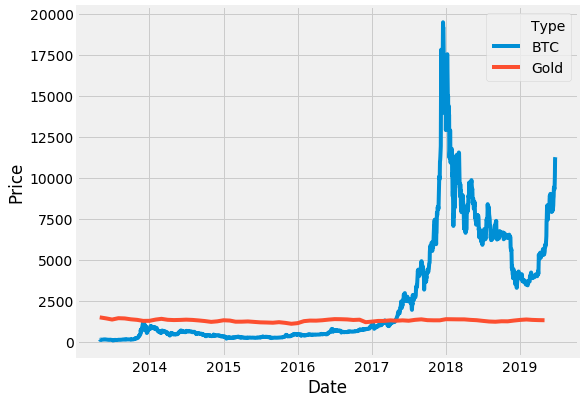

In [82]:
# third plot used on blog post
# Changing style and figsize of plot 
plt.style.use('fivethirtyeight');
plt.figure(figsize=(8, 6), facecolor='w')

# lineplot with df1 data 
sns.lineplot(x = 'Date', y='Price', data=df1, hue='Type');

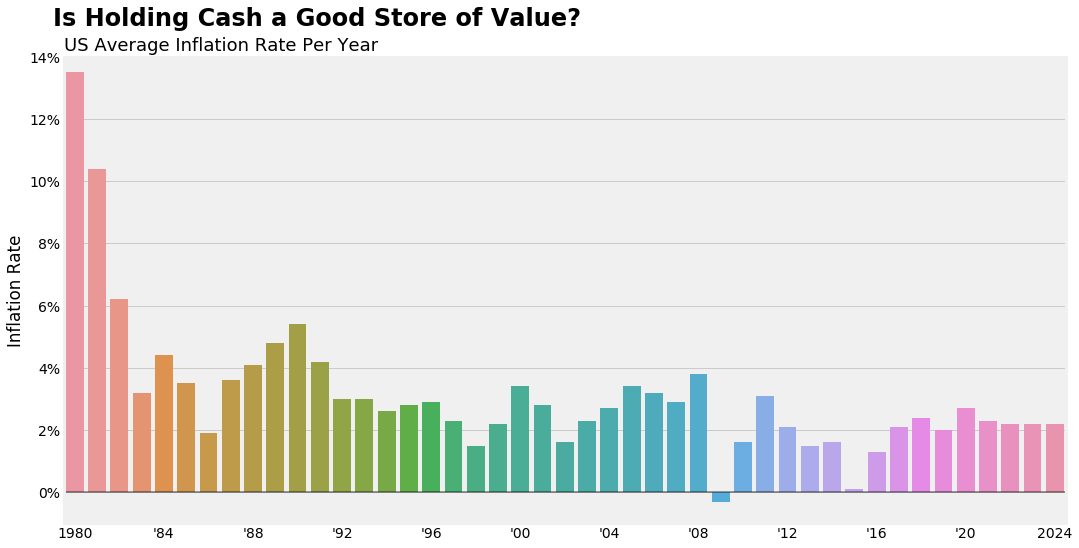

In [83]:
# Last plot used on blog post
# Changing style and figsize of plot 
plt.style.use('fivethirtyeight');
fig, ax = plt.subplots(figsize=(16,8), facecolor='w');

# creating barplot with inflation data
ax1 = sns.barplot(x =inf['Year'].tolist(), y='Inflation Rate', data=inf);

# changing x and y limit and tick names
plt.ylim(-1,14)
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
ax.set_yticklabels(labels=['0%', '2%', '4%', '6%', '8%', '10%', '12%', '14%']);

plt.xlim(-.5,44.5)
ax.set(xticks=range(0,45,4));
ax.set_xticklabels(labels=['1980',"'84", "'88", "'92", "'96", "'00", "'04", "'08", "'12", "'16", "'20", "2024"]);

# Bolded horizontal line at y=0
ax1.axhline(y=0, color='#000000', linewidth=1.5, alpha=.5);

# Title text
ax.text(x=-1, y=15, s="Is Holding Cash a Good Store of Value? ", fontsize=24, fontweight='semibold', color='#000000');

# Subtitle text
ax.text(x=-.5, y=14.2, s='US Average Inflation Rate Per Year', fontsize=18, color='#000000');

# Plotly Visualization

In [0]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode
#plotly.offline.init_notebook_mode(connected=True)

In [0]:
#necesarry to be able to use plotly
plotly.tools.set_credentials_file(username='malex140', api_key='WR2ksP5cT6WLqlyBeViG')

In [86]:
# 1st plot in blog
# Create traces
trace0 = go.Scatter(
    x = bitcoindata['date'],
    y = bitcoindata['price(USD)'],
    mode = 'lines',
    name = 'BTC Price'
)
trace1 = go.Scatter(
    x = bitcoindata['date'],
    y = bitcoindata['activeAddresses'],
    mode = 'lines',
    name = 'activeAddress'
)

# added title
layout = go.Layout(title = "BTC Price / Active Address")

data = [trace0, trace1]

fig = go.Figure(data=data, layout=layout)

#link to post on blog
print(py.plot(fig))
py.iplot(fig)

https://plot.ly/~malex140/96


In [87]:
# 2nd plot on blog
# empty to append 2 traces 
traces=[]

#for loop to groupby "type" alterantive to hue( not available in plotly)
for x, Type in df1.groupby('Type'):
  traces.append(go.Scatter(x=Type.Date, y=Type.ROI, name=x, mode='lines'))

for x, Tick in df2.groupby('Tick'):
  traces.append(go.Scatter(x=Tick.Date, y=Tick.ROI, name=x, mode='lines'))

# adding title and changing tick layout
layout = go.Layout( title = "BTC ROI Against Traditional Assets ROI",
  yaxis = go.layout.YAxis(
        tickmode = 'array',
        tickvals = [2000, 4000, 6000, 8000, 10000, 12000, 14000],
        ticktext = ['2,000%', '4,000%', '6,000%', '8,000%', '10,000%', '12,000%', '14,000%']))
  
fig = go.Figure(data=traces, layout=layout)


#link to post on blog
print(py.plot(fig))
py.iplot(fig)

https://plot.ly/~malex140/100


# Other Plots (DIDN'T USE)

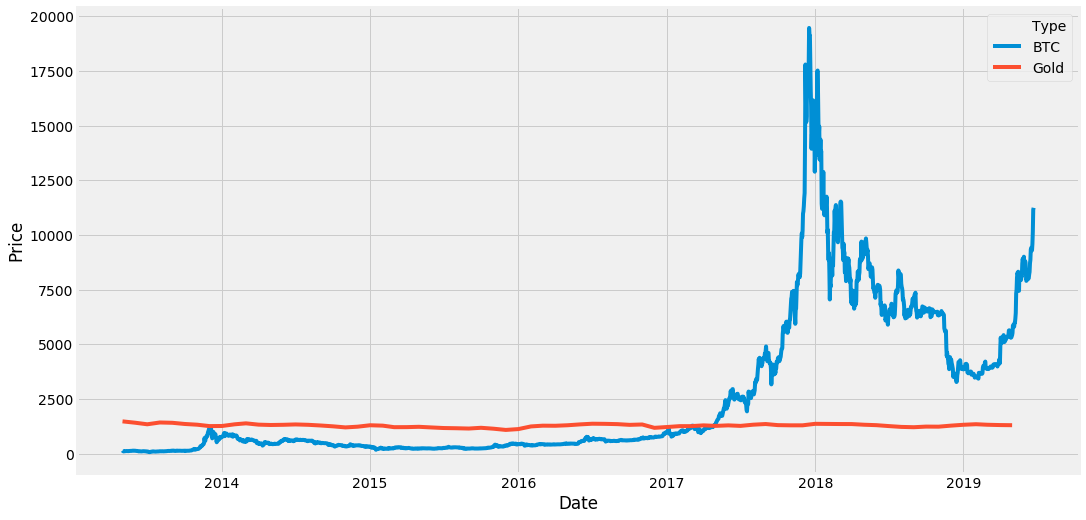

In [88]:
#(Not USED IN BLOG)
plt.style.use('fivethirtyeight');
fig, ax = plt.subplots(figsize=(16,8), facecolor='w');

sns.lineplot(x = 'Date', y='Price', data=df1, hue='Type');


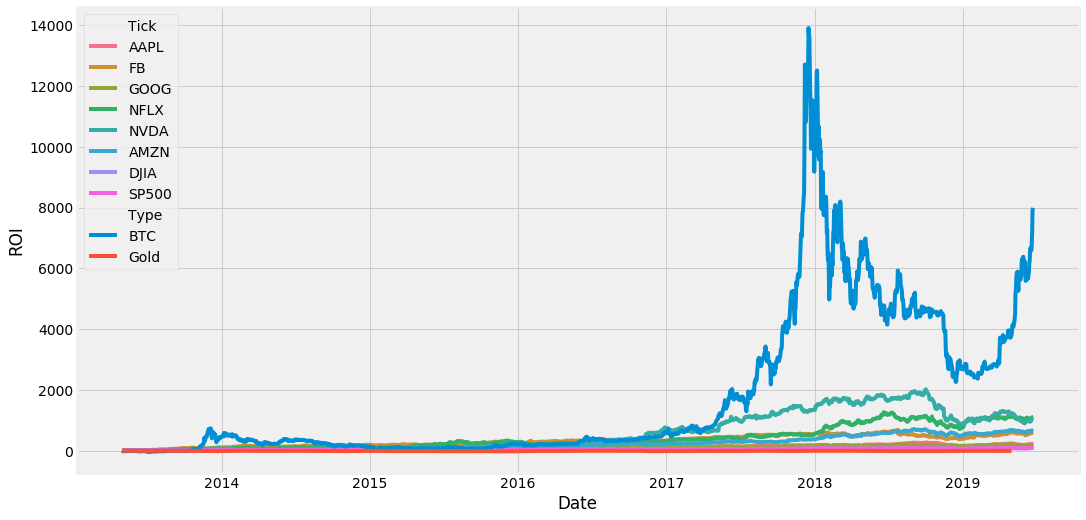

In [89]:
#(Not USED IN BLOG)
plt.style.use('fivethirtyeight');

fig, ax = plt.subplots(figsize=(16,8), facecolor='w');

ax1 = sns.lineplot(x = 'Date', y='ROI', data=df2, hue='Tick');
ax2 = sns.lineplot(x = 'Date', y='ROI', data=df1, hue='Type');